# Climate Data Viz: Vancouver, British Columbia

The historical and current weather data are courtesy of [Environment and Climate Change Canada](https://weather.gc.ca/). The dataset has been downloaded from https://vancouver.weatherstats.ca/download.html.

**Weather Station Overview**

- VANCOUVER INTL A (Vancouver Int'l Airport), BRITISH COLUMBIA 
    * Latitude: 49.19
    * Longitude: -123.18
    * Elevation: 4 m

- VANCOUVER INTL A (Vancouver Int'l Airport), BRITISH COLUMBIA 
    * Latitude: 49.2
    * Longitude: -123.18
    * Elevation: 4 m

- VANCOUVER SEA ISLAND CCG, BRITISH COLUMBIA
    * Latitude: 49.18
    * Longitude: -123.19
    * Elevation: 2 m

- RICHMOND OPERATIONS CENTRE, BRITISH COLUMBIA
    * Latitude: 49.18
    * Longitude: -123.08
    * Elevation: 16 m
    
The stations the data comes from are shown on the map below.

In [1]:
import folium
from folium.plugins import *
from folium import plugins

map_van = folium.Map(location= [49.1666, -123.1336], zoom_start = 13)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

lat = [49.19, 49.2, 49.18, 49.18]
lon = [-123.18, -123.18, -123.19, -123.08]
label = ["Vancouver Int'l Airport, IATA: YVR", "Vancouver Int'l Airport, IATA: YVR", "Vancouver Sea Island CCG, IATA: VVR", "Richmond Operations Centre, IATA: VMO"]

# instantiate a mark cluster object for the incidents in the dataframe
incident = plugins.MarkerCluster().add_to(map_van)
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, label in zip(lat, lon, label):
    folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(incident)
    
map_van.add_child(incidents)

### Load the data into a dataframe from the csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

df = pd.read_csv("weatherstats_vancouver.csv", usecols =['date','max_temperature', 'min_temperature', 'max_relative_humidity', 'min_relative_humidity', 'max_health_index', 'min_health_index'])

# extracting Year and Month-Day duo from the Date column
df['Year'] = df['date'].apply(lambda x: (x[:4]))
df['Month-Day'] = df['date'].apply(lambda x: (x[5:]))

# removing the rows correspondng to leap year i.e., 2-29
df = df[df['Month-Day'] != '02-29']
print (df.shape)
df.head()


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


(2510, 9)


,date,max_temperature,min_temperature,max_relative_humidity,min_relative_humidity,max_health_index,min_health_index,Year,Month-Day
0,2020-11-16,7.7,6.1,97.0,85.0,2.4,1.0,2020,11-16
1,2020-11-15,11.6,4.7,96.0,70.0,2.4,1.2,2020,11-15
2,2020-11-14,8.1,2.3,94.0,78.0,2.4,1.1,2020,11-14
3,2020-11-13,8.4,4.4,96.0,76.0,2.3,1.0,2020,11-13
4,2020-11-12,6.0,3.2,96.0,73.0,2.2,1.0,2020,11-12


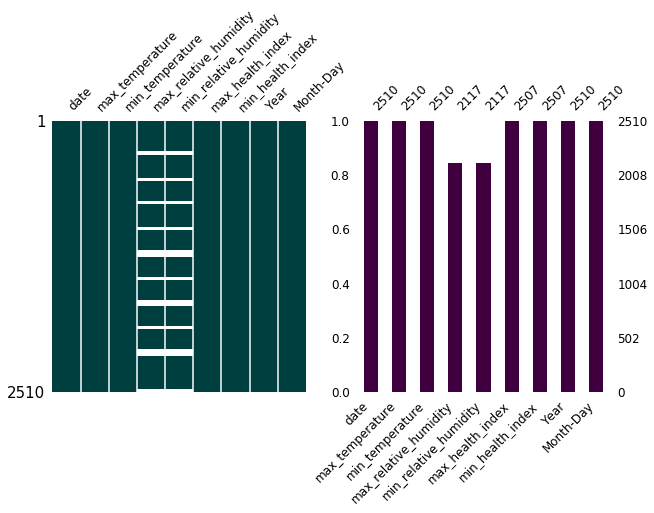

In [3]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

### Temperature Data Manipulation for 2014-2020

In [4]:
# high temperatures by day of the year 2014
tmax_2014 = df[(df['Year'] == '2014')]
tmax_2014 = tmax_2014.groupby(['Month-Day']).aggregate({'max_temperature':np.max})

# low temperatures by day of the year 2014
tmin_2014 = df[(df['Year'] == '2014')]
tmin_2014 = tmin_2014.groupby(['Month-Day']).aggregate({'min_temperature':np.min})

# high temperatures by day of the year 2015
tmax_2015 = df[(df['Year'] == '2015')]
tmax_2015 = tmax_2015.groupby(['Month-Day']).aggregate({'max_temperature':np.max})

# low temperatures by day of the year 2015
tmin_2015 = df[(df['Year'] == '2015')]
tmin_2015 = tmin_2015.groupby(['Month-Day']).aggregate({'min_temperature':np.min})

# high temperatures by day of the year 2016
tmax_2016 = df[(df['Year'] == '2016')]
tmax_2016 = tmax_2016.groupby(['Month-Day']).aggregate({'max_temperature':np.max})

# low temperatures by day of the year 2016
tmin_2016 = df[(df['Year'] == '2016')]
tmin_2016 = tmin_2016.groupby(['Month-Day']).aggregate({'min_temperature':np.min})

# high temperatures by day of the year 2017
tmax_2017 = df[(df['Year'] == '2017')]
tmax_2017 = tmax_2017.groupby(['Month-Day']).aggregate({'max_temperature':np.max})

# low temperatures by day of the year 2017
tmin_2017 = df[(df['Year'] == '2017')]
tmin_2017 = tmin_2017.groupby(['Month-Day']).aggregate({'min_temperature':np.min})

# high temperatures by day of the year 2018
tmax_2018 = df[(df['Year'] == '2018')]
tmax_2018 = tmax_2018.groupby(['Month-Day']).aggregate({'max_temperature':np.max})

# low temperatures by day of the year 2018
tmin_2018 = df[(df['Year'] == '2018')]
tmin_2018 = tmin_2018.groupby(['Month-Day']).aggregate({'min_temperature':np.min})

# high temperatures by day of the year 2019
tmax_2019 = df[(df['Year'] == '2019')]
tmax_2019 = tmax_2019.groupby(['Month-Day']).aggregate({'max_temperature':np.max})

# low temperatures by day of the year 2019
tmin_2019 = df[(df['Year'] == '2019')]
tmin_2019 = tmin_2019.groupby(['Month-Day']).aggregate({'min_temperature':np.min})

# high temperatures by day of the year 2020
tmax_2020 = df[(df['Year'] == '2020')]
tmax_2020 = tmax_2020.groupby(['Month-Day']).aggregate({'max_temperature':np.max})

# low temperatures by day of the year 2020
tmin_2020 = df[(df['Year'] == '2020')]
tmin_2020 = tmin_2020.groupby(['Month-Day']).aggregate({'min_temperature':np.min})

### Simple Function to Plot the Low and High Temperatures over 2014-2020 using Line Plots

In [5]:
def plot(year, tmax_year, tmin_year):
    
    plt.figure(figsize = [15, 6])

    # line plots for high and low temperatures over the year 2005-2014

    tmin_data = np.array(tmin_year.min_temperature)
    tmax_data = np.array(tmax_year.max_temperature)

    plt.plot(tmin_data, 'salmon')
    plt.plot(tmax_data, 'lightgray')

    plt.xlabel('Day')
    plt.ylabel('Temperature in Degree Celsius')
    plt.title("{} Climate Data: Vancouver, British Columbia".format(year))
    plt.legend(['Low Temperature', 'High Temperature'], frameon = False)

    # fill the area between the tmin_data and tmax_data
    plt.gca().fill_between(range(len(tmin_data)), 
                       tmin_data, tmax_data, 
                       facecolor ='gray', 
                       alpha = 0.1)

    # labelling ticks

    plt.xticks(range(0, len(tmin_year), 20), tmin_year.index[range(0, len(tmin_year), 20)], rotation = '35')

    # removing the frame
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

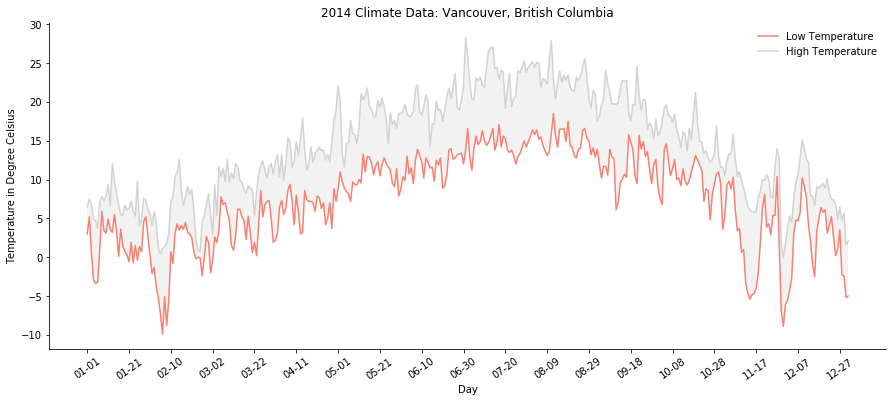

In [6]:
plot(2014, tmax_2014, tmin_2014)

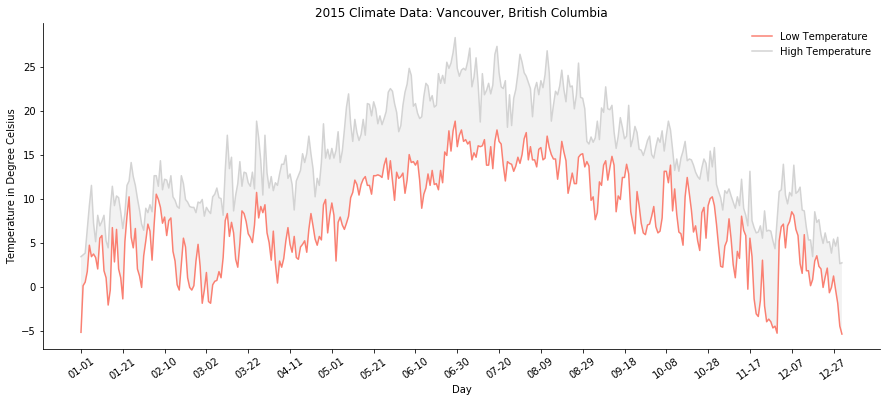

In [7]:
plot(2015, tmax_2015, tmin_2015)

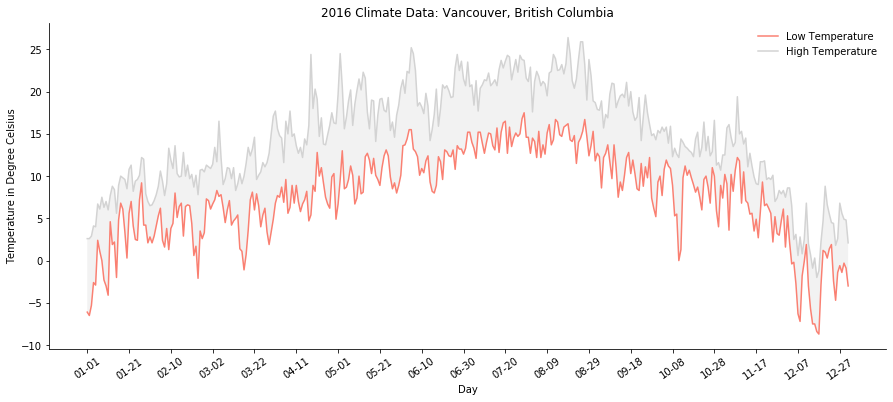

In [8]:
plot(2016, tmax_2016, tmin_2016)

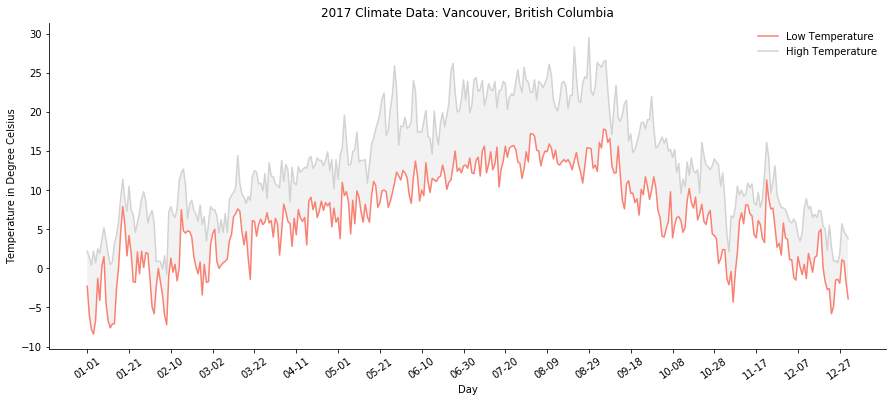

In [9]:
plot(2017, tmax_2017, tmin_2017)

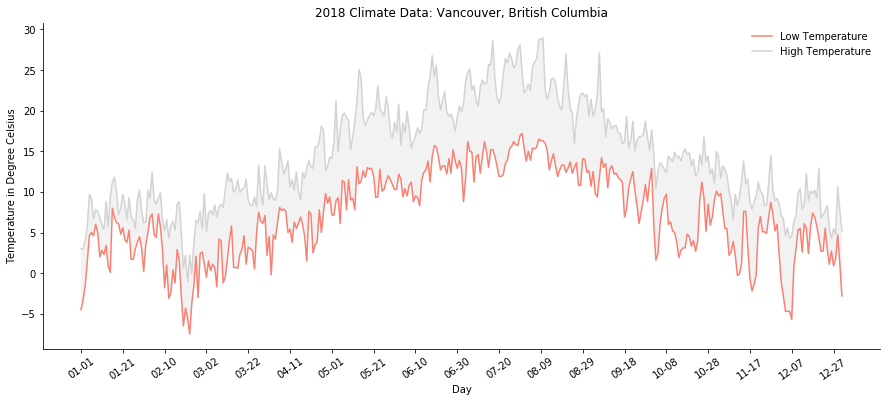

In [10]:
plot(2018, tmax_2018, tmin_2018)

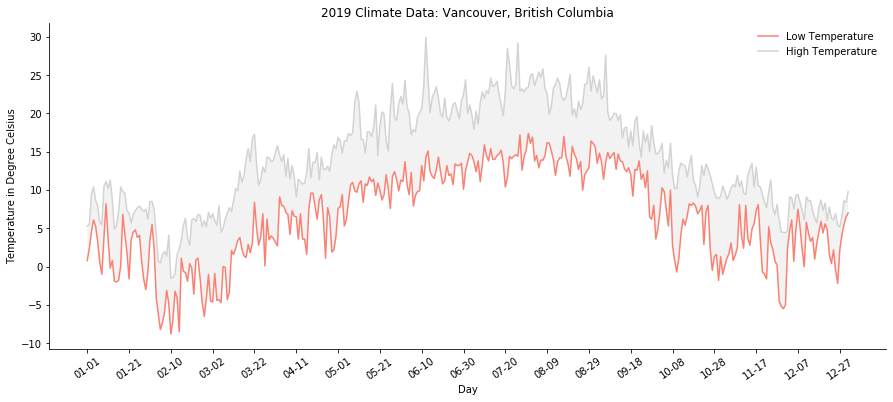

In [11]:
plot(2019, tmax_2019, tmin_2019)

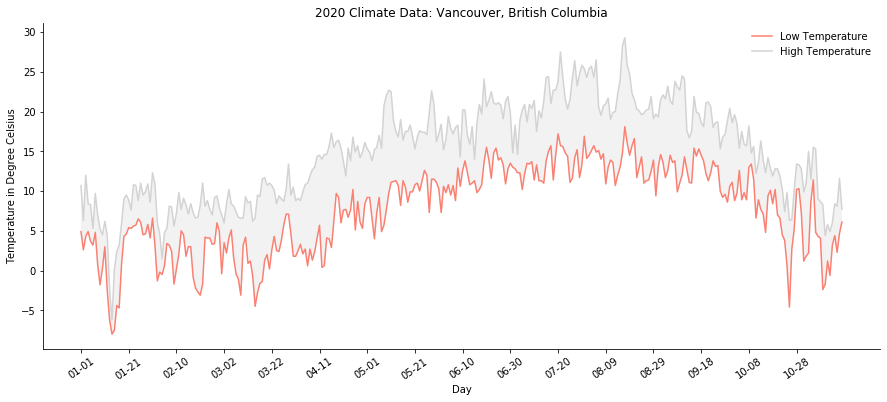

In [12]:
plot(2020, tmax_2020, tmin_2020)

### Special Case

- 2015: this year corresonds to record *high* temperature throughout 2014-2020

- 2019: this year corresonds to record *low* temperature throughout 2014-2020

Let's also visualize this scenario.

In [13]:
# high temperatures by day over through 2014, 2016, 2017, 2018, 2019 and 2020
tmax = df[(df['Year'] != '2015')].groupby('Month-Day').aggregate({'max_temperature':np.max})

# low temperatures by day through 2014, 2015, 2016, 2017, 2018 and 2020
tmin = df[(df['Year'] != '2019')].groupby('Month-Day').aggregate({'min_temperature':np.min})

In [14]:
# high temperatures by day of the year 2015
tmax_2015 = df[(df['Year'] == '2015')].groupby('Month-Day').aggregate({'max_temperature':np.max})

# low temperatures by day of the year 2019
tmin_2019 = df[(df['Year'] == '2019')].groupby('Month-Day').aggregate({'min_temperature':np.min})

In [15]:
broken_tmax_2015_id = np.where(tmax_2015.max_temperature > tmax.max_temperature)[0]
broken_tmax_2015 = tmax_2015.iloc[broken_tmax_2015_id]

broken_tmin_2019_id = np.where(tmin_2019.min_temperature < tmin.min_temperature)[0]
broken_tmin_2019 = tmin_2019.iloc[broken_tmin_2019_id]

print ("There are {} and {} points for which the five year record (2014-2020) of high and low temperatures, respectively \
were broken in 2015 and 2019 respectively.".format(len(broken_tmax_2015_id), len(broken_tmin_2019_id)))

There are 78 and 64 points for which the five year record (2014-2020) of high and low temperatures, respectively were broken in 2015 and 2019 respectively.


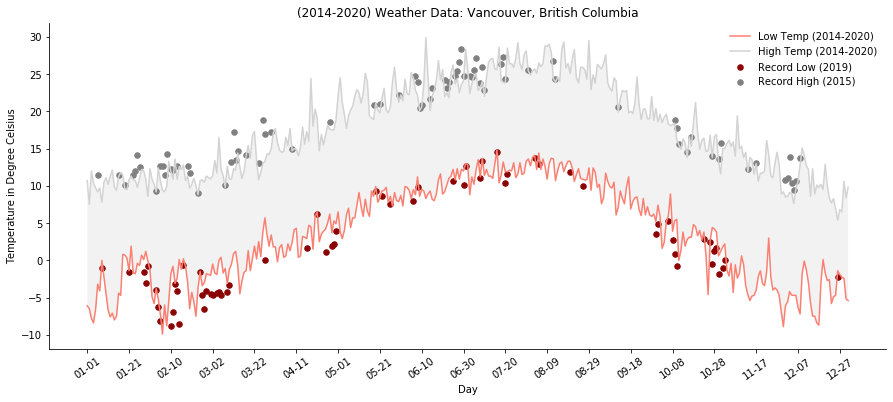

In [16]:
plt.figure(figsize = [15, 6])

# line plots for high and low temperatures over the year 2005-2014

tmin_data = np.array(tmin.min_temperature)
tmax_data = np.array(tmax.max_temperature)

plt.plot(tmin_data, 'salmon')
plt.plot(tmax_data, 'lightgray')

# scatter plots for high and low temperatures in 2014 and 2019 when they've broken previous records 

plt.scatter(broken_tmin_2019_id, broken_tmin_2019, s = 30, c = 'darkred', label = 'broke past low')
plt.scatter(broken_tmax_2015_id, broken_tmax_2015, s = 30, c = 'gray', label = 'broke past high')

# making the frame nice! 

plt.xlabel('Day')
plt.ylabel('Temperature in Degree Celsius')
plt.title("(2014-2020) Weather Data: Vancouver, British Columbia")
plt.legend(['Low Temp (2014-2020)', 'High Temp (2014-2020)', "Record Low (2019)", "Record High (2015)"], \
           frameon = False)

# fill the area between the tmin_data and tmax_data

plt.gca().fill_between(range(len(tmin_data)), 
                       tmin_data, tmax_data, 
                       facecolor='gray', 
                       alpha=0.1)

# labelling ticks

plt.xticks(range(0, len(tmin), 20), tmin.index[range(0, len(tmin), 20)], rotation = '35')

# removing the frame

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

### Relative Humidity Data Manipulation for 2014-2020

In [17]:
# high Relative Humidity by day of the year 2014
hum_max_2014 = df[(df['Year'] == '2014')]
hum_max_2014 = hum_max_2014.groupby(['Month-Day']).aggregate({'max_relative_humidity':np.max})

# low Relative Humidity by day of the year 2014
hum_min_2014 = df[(df['Year'] == '2014')]
hum_min_2014 = hum_min_2014.groupby(['Month-Day']).aggregate({'min_relative_humidity':np.min})

# high Relative Humidity by day of the year 2015
hum_max_2015 = df[(df['Year'] == '2015')]
hum_max_2015 = hum_max_2015.groupby(['Month-Day']).aggregate({'max_relative_humidity':np.max})

# low Relative Humidity by day of the year 2015
hum_min_2015 = df[(df['Year'] == '2015')]
hum_min_2015 = hum_min_2015.groupby(['Month-Day']).aggregate({'min_relative_humidity':np.min})

# high Relative Humidity by day of the year 2016
hum_max_2016 = df[(df['Year'] == '2016')]
hum_max_2016 = hum_max_2016.groupby(['Month-Day']).aggregate({'max_relative_humidity':np.max})

# low Relative Humidity by day of the year 2016
hum_min_2016 = df[(df['Year'] == '2016')]
hum_min_2016 = hum_min_2016.groupby(['Month-Day']).aggregate({'min_relative_humidity':np.min})

# high Relative Humidity by day of the year 2017
hum_max_2017 = df[(df['Year'] == '2017')]
hum_max_2017 = hum_max_2017.groupby(['Month-Day']).aggregate({'max_relative_humidity':np.max})

# low Relative Humidity by day of the year 2017
hum_min_2017 = df[(df['Year'] == '2017')]
hum_min_2017 = hum_min_2017.groupby(['Month-Day']).aggregate({'min_relative_humidity':np.min})

# high Relative Humidity by day of the year 2018
hum_max_2018 = df[(df['Year'] == '2018')]
hum_max_2018 = hum_max_2018.groupby(['Month-Day']).aggregate({'max_relative_humidity':np.max})

# low Relative Humidity by day of the year 2018
hum_min_2018 = df[(df['Year'] == '2018')]
hum_min_2018 = hum_min_2018.groupby(['Month-Day']).aggregate({'min_relative_humidity':np.min})

# high Relative Humidity by day of the year 2019
hum_max_2019 = df[(df['Year'] == '2019')]
hum_max_2019 = hum_max_2019.groupby(['Month-Day']).aggregate({'max_relative_humidity':np.max})

# low Relative Humidity by day of the year 2019
hum_min_2019 = df[(df['Year'] == '2019')]
hum_min_2019 = hum_min_2019.groupby(['Month-Day']).aggregate({'min_relative_humidity':np.min})

# high Relative Humidity by day of the year 2020
hum_max_2020 = df[(df['Year'] == '2020')]
hum_max_2020 = hum_max_2020.groupby(['Month-Day']).aggregate({'max_relative_humidity':np.max})

# low Relative Humidity by day of the year 2020
hum_min_2020 = df[(df['Year'] == '2020')]
hum_min_2020 = hum_min_2020.groupby(['Month-Day']).aggregate({'min_relative_humidity':np.min})

### Simple Function to Plot the High and Low Relative Humidity over 2014-2020 using Line Plots

In [18]:
def plot(year, hum_max_year, hum_min_year):
    
    plt.figure(figsize = [15, 6])

    # line plots for high and low Relative Humidity over the year 2014-2020

    hum_min_data = np.array(hum_min_year.min_relative_humidity)
    hum_max_data = np.array(hum_max_year.max_relative_humidity)

    plt.plot(hum_min_data,  'lightseagreen')
    plt.plot(hum_max_data, 'lightpink')
    

    plt.xlabel('Day')
    plt.ylabel('Relative Humidity (%)')
    plt.title("{} Climate Data (Relative Humidity): Vancouver, British Columbia".format(year))
    plt.legend(['Low Rel Humidity', 'High Rel Humidity'], frameon = False)

    # fill the area between the hum_min_data and hum_max_data
    plt.gca().fill_between(range(len(hum_min_data)), 
                       hum_min_data, hum_max_data, 
                       facecolor ='gray', 
                       alpha = 0.1)

    # labelling ticks

    plt.xticks(range(0, len(hum_min_year), 20), hum_min_year.index[range(0, len(hum_min_year), 20)], rotation = '35')

    # removing the frame
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

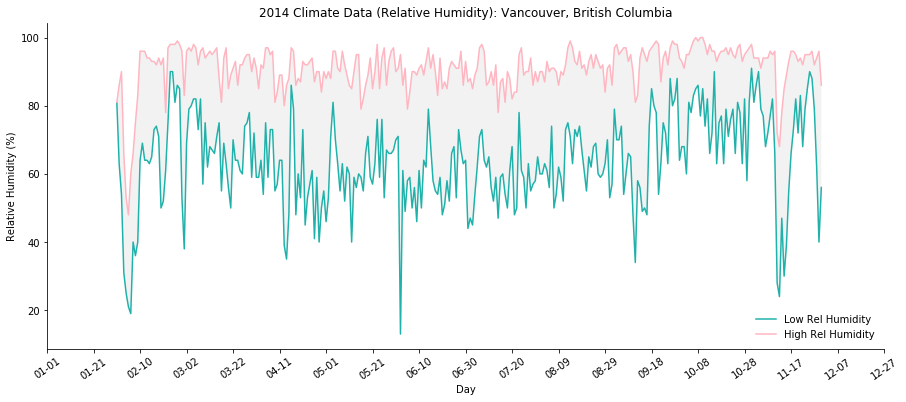

In [19]:
plot(2014, hum_max_2014, hum_min_2014)

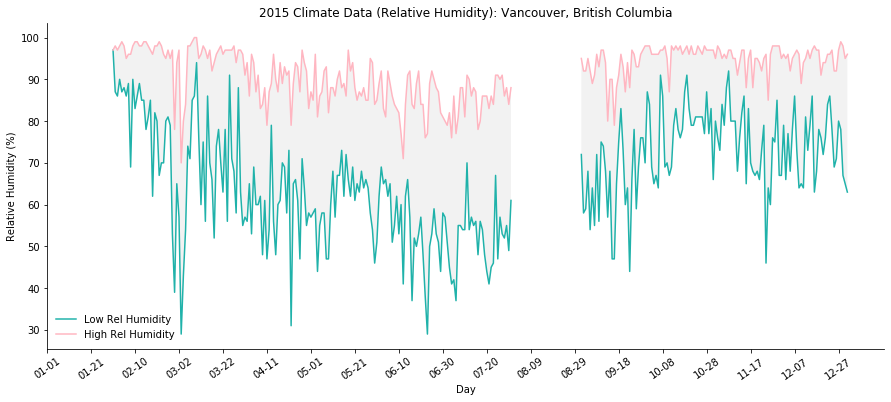

In [20]:
plot(2015, hum_max_2015, hum_min_2015)

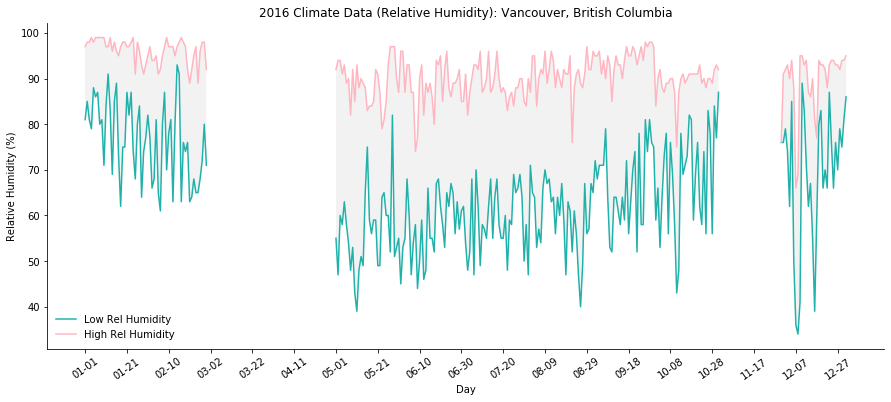

In [21]:
plot(2016, hum_max_2016, hum_min_2016)

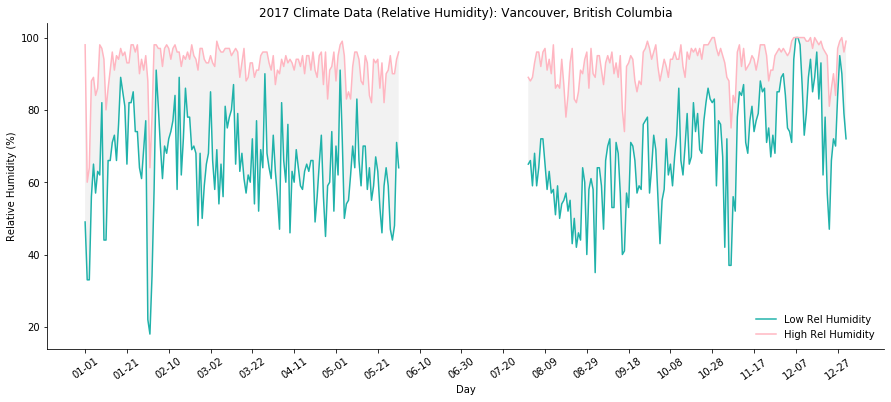

In [22]:
plot(2017, hum_max_2017, hum_min_2017)

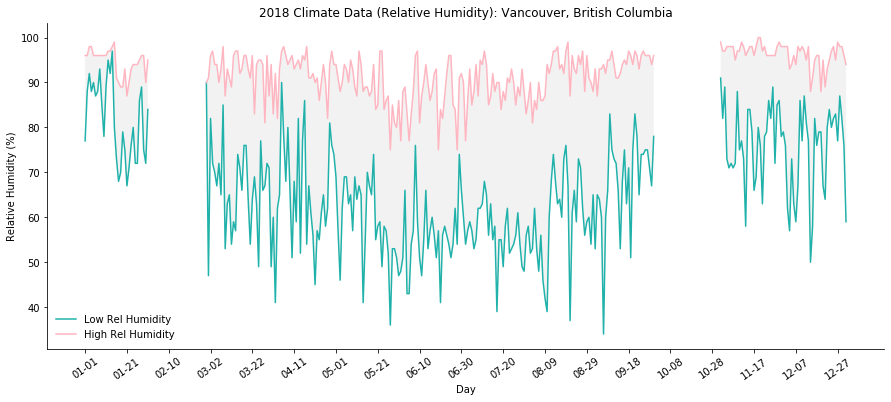

In [23]:
plot(2018, hum_max_2018, hum_min_2018)

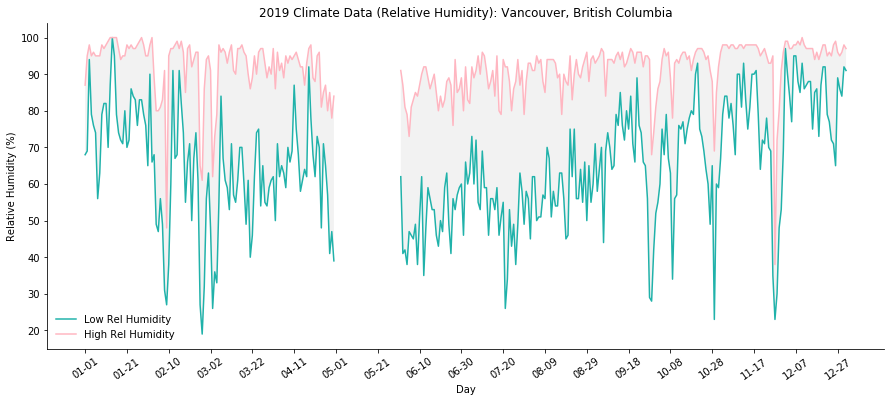

In [24]:
plot(2019, hum_max_2019, hum_min_2019)

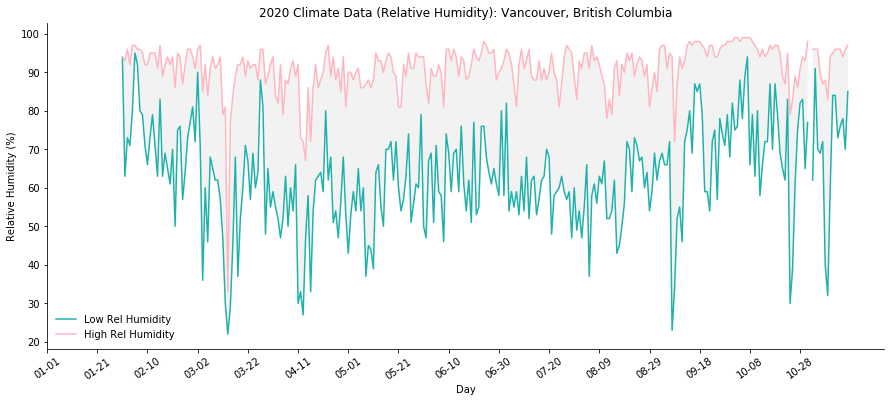

In [25]:
plot(2020, hum_max_2020, hum_min_2020)

### Special Case

- 2017: this year corresonds to record *high* relative humidity throughout 2014-2020

- 2019: this year corresonds to record *low* relative humidity throughout 2014-2020

Let's also visualize this scenario.

In [26]:
# high Relative Humidity by day over through 2014, 2015, 2016, 2018, 2019 and 2020
hum_max = df[(df['Year'] != '2017')].groupby('Month-Day').aggregate({'max_relative_humidity':np.max})

# low Relative Humidity by day through 2014, 2015, 2016, 2017, 2018 and 2020
hum_min = df[(df['Year'] != '2019')].groupby('Month-Day').aggregate({'min_relative_humidity':np.min})

In [27]:
# high Relative Humidity by day of the year 2017
hum_max_2017 = df[(df['Year'] == '2017')].groupby('Month-Day').aggregate({'max_relative_humidity':np.max})

# low Relative Humidity by day of the year 2019
hum_min_2019 = df[(df['Year'] == '2019')].groupby('Month-Day').aggregate({'min_relative_humidity':np.min})

In [28]:
broken_hum_max_2017_id = np.where(hum_max_2017.max_relative_humidity > hum_max.max_relative_humidity)[0]
broken_hum_max_2017 = hum_max_2017.iloc[broken_hum_max_2017_id]

broken_hum_min_2019_id = np.where(hum_min_2019.min_relative_humidity < hum_min.min_relative_humidity)[0]
broken_hum_min_2019 = hum_min_2019.iloc[broken_hum_min_2019_id]

print ("There are {} and {} points for which the five year record (2014-2020) of high and low relative humidity, respectively \
were broken in 2017 and 2019 respectively.".format(len(broken_hum_max_2017_id), len(broken_hum_min_2019_id)))

There are 42 and 70 points for which the five year record (2014-2020) of high and low relative humidity, respectively were broken in 2017 and 2019 respectively.


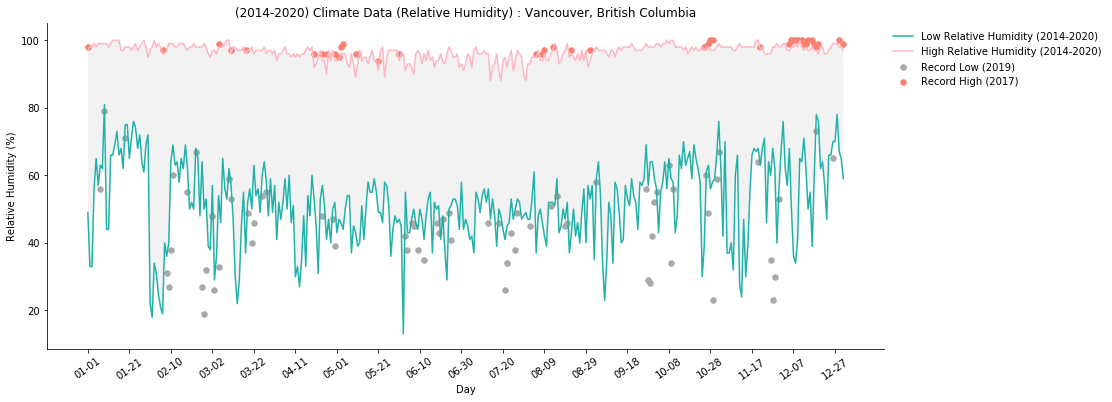

In [29]:
plt.figure(figsize = [15, 6])

# line plots for high and low Relative Humidity over the year 2005-2014

hum_min_data = np.array(hum_min.min_relative_humidity)
hum_max_data = np.array(hum_max.max_relative_humidity)

plt.plot(hum_min_data, 'lightseagreen')
plt.plot(hum_max_data, 'lightpink')

# scatter plots for high and low Relative Humidity in 2017 and 2019 when they've broken previous records 

plt.scatter(broken_hum_min_2019_id, broken_hum_min_2019, s = 30, c = 'darkgray', label = 'broke past low')
plt.scatter(broken_hum_max_2017_id, broken_hum_max_2017, s = 30, c = 'salmon', label = 'broke past high')

# making the frame nice! 

plt.xlabel('Day')
plt.ylabel('Relative Humidity (%)')
plt.title("(2014-2020) Climate Data (Relative Humidity) : Vancouver, British Columbia")
plt.legend(['Low Relative Humidity (2014-2020)', 'High Relative Humidity (2014-2020)', "Record Low (2019)", "Record High (2017)"], \
           frameon = False, bbox_to_anchor=(1, 1))


# fill the area between the hum_min_data and hum_max_data

plt.gca().fill_between(range(len(hum_min_data)), 
                       hum_min_data, hum_max_data, 
                       facecolor='gray', 
                       alpha=0.1)

# labelling ticks

plt.xticks(range(0, len(hum_min), 20), hum_min.index[range(0, len(hum_min), 20)], rotation = '35')

# removing the frame

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

### Health Index Data Manipulation for 2014-2020

In [30]:
# high Health Index by day of the year 2014
hindx_max_2014 = df[(df['Year'] == '2014')]
hindx_max_2014 = hindx_max_2014.groupby(['Month-Day']).aggregate({'max_health_index':np.max})

# low Health Index by day of the year 2014
hindx_min_2014 = df[(df['Year'] == '2014')]
hindx_min_2014 = hindx_min_2014.groupby(['Month-Day']).aggregate({'min_health_index':np.min})

# high Health Index by day of the year 2015
hindx_max_2015 = df[(df['Year'] == '2015')]
hindx_max_2015 = hindx_max_2015.groupby(['Month-Day']).aggregate({'max_health_index':np.max})

# low Health Index by day of the year 2015
hindx_min_2015 = df[(df['Year'] == '2015')]
hindx_min_2015 = hindx_min_2015.groupby(['Month-Day']).aggregate({'min_health_index':np.min})

# high Health Index by day of the year 2016
hindx_max_2016 = df[(df['Year'] == '2016')]
hindx_max_2016 = hindx_max_2016.groupby(['Month-Day']).aggregate({'max_health_index':np.max})

# low Health Index by day of the year 2016
hindx_min_2016 = df[(df['Year'] == '2016')]
hindx_min_2016 = hindx_min_2016.groupby(['Month-Day']).aggregate({'min_health_index':np.min})

# high Health Index by day of the year 2017
hindx_max_2017 = df[(df['Year'] == '2017')]
hindx_max_2017 = hindx_max_2017.groupby(['Month-Day']).aggregate({'max_health_index':np.max})

# low Health Index by day of the year 2017
hindx_min_2017 = df[(df['Year'] == '2017')]
hindx_min_2017 = hindx_min_2017.groupby(['Month-Day']).aggregate({'min_health_index':np.min})

# high Health Index by day of the year 2018
hindx_max_2018 = df[(df['Year'] == '2018')]
hindx_max_2018 = hindx_max_2018.groupby(['Month-Day']).aggregate({'max_health_index':np.max})

# low Health Index by day of the year 2018
hindx_min_2018 = df[(df['Year'] == '2018')]
hindx_min_2018 = hindx_min_2018.groupby(['Month-Day']).aggregate({'min_health_index':np.min})

# high Health Index by day of the year 2019
hindx_max_2019 = df[(df['Year'] == '2019')]
hindx_max_2019 = hindx_max_2019.groupby(['Month-Day']).aggregate({'max_health_index':np.max})

# low Health Index by day of the year 2019
hindx_min_2019 = df[(df['Year'] == '2019')]
hindx_min_2019 = hindx_min_2019.groupby(['Month-Day']).aggregate({'min_health_index':np.min})

# high Health Index by day of the year 2020
hindx_max_2020 = df[(df['Year'] == '2020')]
hindx_max_2020 = hindx_max_2020.groupby(['Month-Day']).aggregate({'max_health_index':np.max})

# low Health Index by day of the year 2020
hindx_min_2020 = df[(df['Year'] == '2020')]
hindx_min_2020 = hindx_min_2020.groupby(['Month-Day']).aggregate({'min_health_index':np.min})

### Simple Function to Plot the Low and High Health Index over 2014-2020 using Line Plots

In [31]:
def plot(year, hindx_max_year, hindx_min_year):
    
    plt.figure(figsize = [15, 6])

    # line plots for high and low Health Index over the year 2014-2020

    hindx_min_data = np.array(hindx_min_year.min_health_index)
    hindx_max_data = np.array(hindx_max_year.max_health_index)

    plt.plot(hindx_min_data,  'darkseagreen')
    plt.plot(hindx_max_data, 'lightblue')
    

    plt.xlabel('Day')
    plt.ylabel('Health Index')
    plt.title("{} Health Index: Vancouver, British Columbia".format(year))
    plt.legend(['Low Health Index', 'High Helath Index'], frameon = False)

    # fill the area between the hindx_min_data and hindx_max_data
    plt.gca().fill_between(range(len(hindx_min_data)), 
                       hindx_min_data, hindx_max_data, 
                       facecolor ='gray', 
                       alpha = 0.1)

    # labelling ticks

    plt.xticks(range(0, len(hindx_min_year), 20), hindx_min_year.index[range(0, len(hindx_min_year), 20)], rotation = '35')

    # removing the frame
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

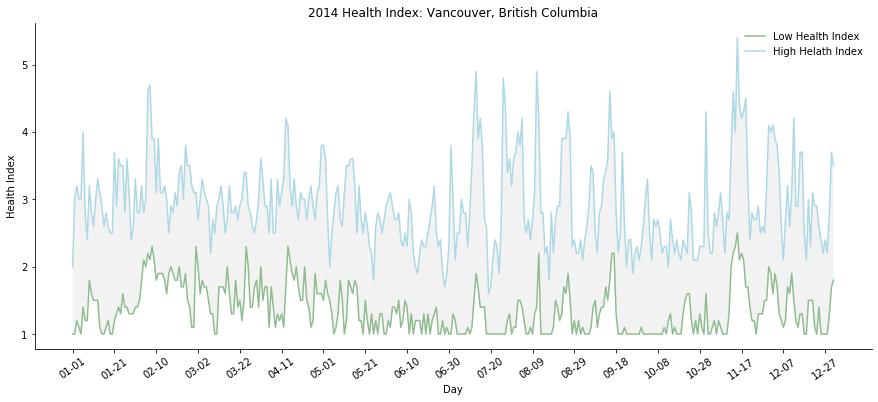

In [32]:
plot(2014, hindx_max_2014, hindx_min_2014)

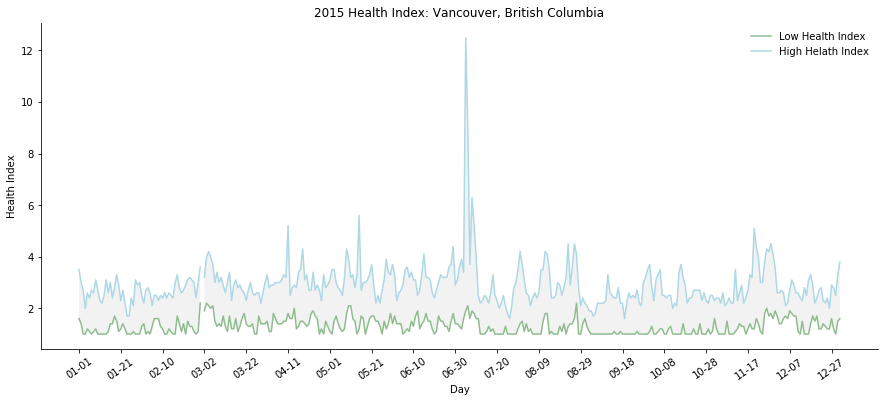

In [33]:
plot(2015, hindx_max_2015, hindx_min_2015)

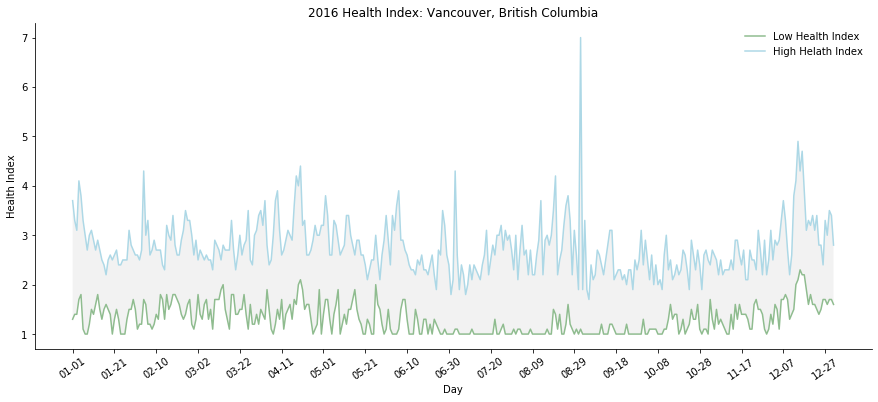

In [34]:
plot(2016, hindx_max_2016, hindx_min_2016)

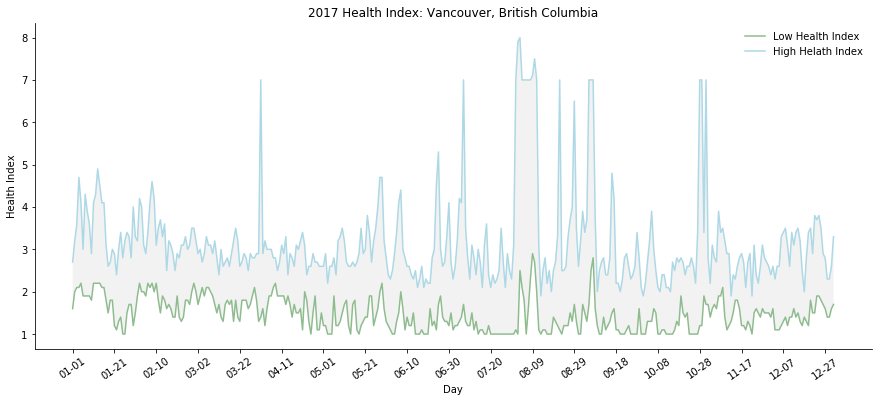

In [35]:
plot(2017, hindx_max_2017, hindx_min_2017)

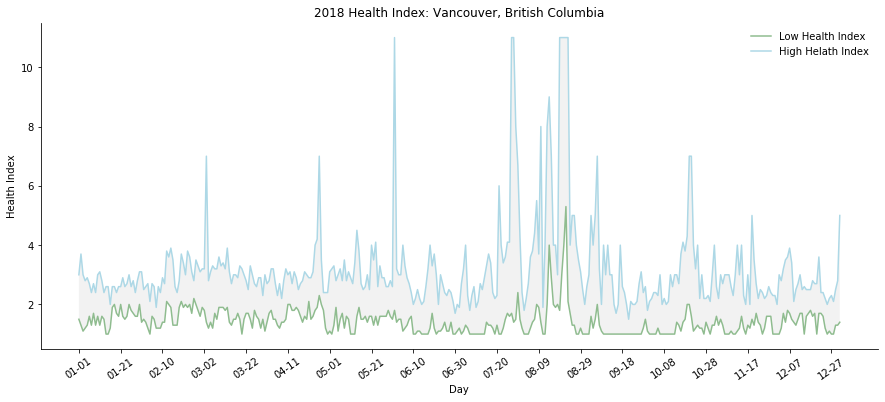

In [36]:
plot(2018, hindx_max_2018, hindx_min_2018)

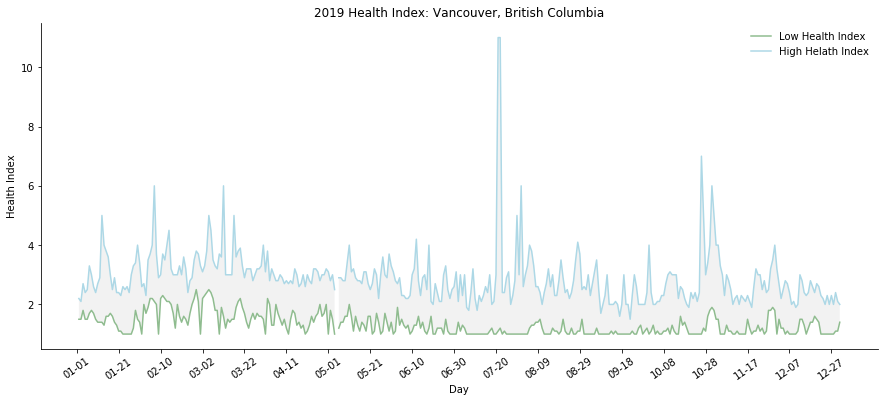

In [37]:
plot(2019, hindx_max_2019, hindx_min_2019)

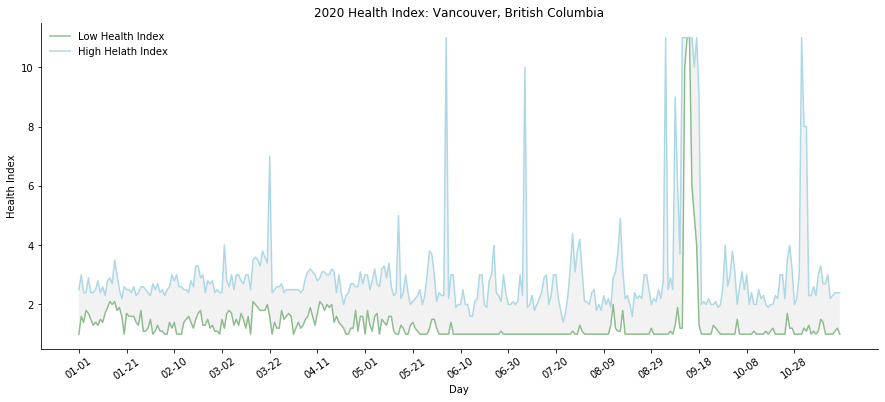

In [38]:
plot(2020, hindx_max_2020, hindx_min_2020)

### Special Case

- 2017: this year corresonds to record *high* health index throughout 2014-2020

- 2015: this year corresonds to record *low* health index throughout 2014-2020

Let's also visualize this scenario.

In [39]:
# high health indices by day over through 2014, 2015, 2016, 2018, 2019 and 2020
hindx_max = df[(df['Year'] != '2017')].groupby('Month-Day').aggregate({'max_health_index':np.max})

# low health indices by day through 2014, 2016, 2017, 2018, 2019 and 2020
hindx_min = df[(df['Year'] != '2015')].groupby('Month-Day').aggregate({'min_health_index':np.min})

# high health indices by day of the year 2017
hindx_max_2017 = df[(df['Year'] == '2017')].groupby('Month-Day').aggregate({'max_health_index':np.max})

# low health indices by day of the year 2015
hindx_min_2015 = df[(df['Year'] == '2015')].groupby('Month-Day').aggregate({'min_health_index':np.min})

broken_hindx_max_2017_id = np.where(hindx_max_2017.max_health_index > hindx_max.max_health_index)[0]
broken_hindx_max_2017 = hindx_max_2017.iloc[broken_hindx_max_2017_id]

broken_hindx_min_2015_id = np.where(hindx_min_2015.min_health_index < hindx_min.min_health_index)[0]
broken_hindx_min_2015 = hindx_min_2015.iloc[broken_hindx_min_2015_id]

print ("There are {} and {} points for which the five year record (2014-2020) of high and low relative humidity, respectively \
were broken in 2017 and 2015 respectively.".format(len(broken_hindx_max_2017_id), len(broken_hindx_min_2015_id)))

There are 71 and 37 points for which the five year record (2014-2020) of high and low relative humidity, respectively were broken in 2017 and 2015 respectively.


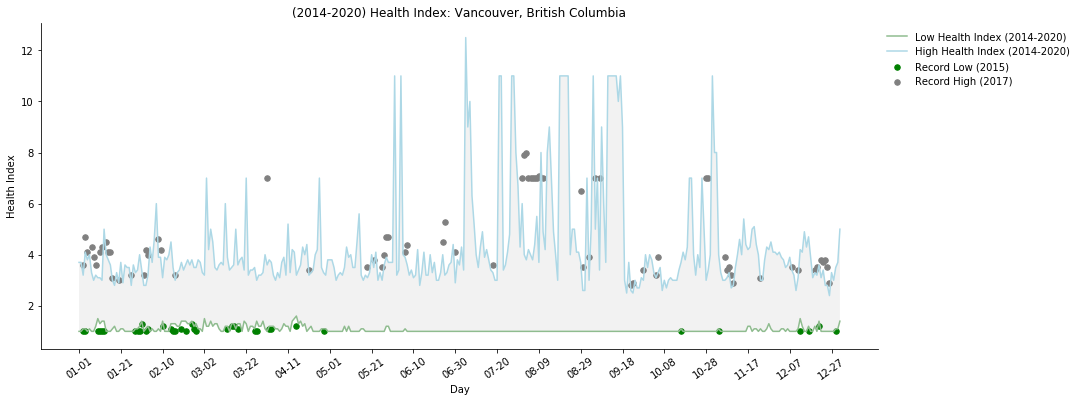

In [40]:
plt.figure(figsize = [15, 6])

# line plots for high and low health indices over the year 2014-2020

hindx_min_data = np.array(hindx_min.min_health_index)
hindx_max_data = np.array(hindx_max.max_health_index)

plt.plot(hindx_min_data, 'darkseagreen')
plt.plot(hindx_max_data, 'lightblue')

# scatter plots for high and low health indices in 2017 and 2015 when they've broken previous records 

plt.scatter(broken_hindx_min_2015_id, broken_hindx_min_2015, s = 30, c = 'green', label = 'broke past low')
plt.scatter(broken_hindx_max_2017_id, broken_hindx_max_2017, s = 30, c = 'gray', label = 'broke past high')

# making the frame nice! 

plt.xlabel('Day')
plt.ylabel('Health Index')
plt.title("(2014-2020) Health Index: Vancouver, British Columbia")
plt.legend(['Low Health Index (2014-2020)', 'High Health Index (2014-2020)', "Record Low (2015)", "Record High (2017)"], \
           frameon = False, bbox_to_anchor=(1, 1))


# fill the area between the tmin_data and tmax_data

plt.gca().fill_between(range(len(hindx_min_data)), 
                       hindx_min_data, hindx_max_data, 
                       facecolor='gray', 
                       alpha=0.1)

# labelling ticks

plt.xticks(range(0, len(hindx_min), 20), hindx_min.index[range(0, len(hindx_min), 20)], rotation = '35')

# removing the frame

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()